In [9]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import math

#nombre des clients
n = 9

#capacité du vehicule
Q = 20

#list des clients
N = [i for i in range(1,n+1)]

#nombre des villes (ou nombre des vertices)
V=[0]+N

#matrice coûts

C = np.asarray([[0, 217, 690, 581, 749, 894, 1063, 938, 1065, 1000],
 [217, 0, 462, 409, 537, 677, 845, 711, 838, 773],
 [690, 462, 0, 254, 137, 537, 450, 251, 378, 313],   
 [581, 409, 254, 0, 215, 706, 698, 499, 626, 561],
 [749, 537, 137, 215, 0, 646, 559, 359, 487, 421],
 [894, 677, 537, 706, 646, 0, 206, 290, 469, 403],   
 [1063, 845, 450, 698, 559, 206, 0, 203, 382,317],   
 [938, 711, 251, 499, 359, 290, 203, 0, 187, 122],   
 [1065, 838, 378, 626, 487, 469, 382, 187, 0, 66],
 [1000, 773, 313, 561, 421, 403, 317, 122, 66, 0],   
])

# List de demande

* 0. Lille: dépôt
* 1. Paris: 2
* 2. Lyon:5
* 3. Besançon: 5
* 4. Annecy: 5
* 5. Toulouse: 5
* 6. Perpignan: 5
* 7. Nîmes: 5
* 8. Toulon: 5
* 9. Marseille: 10

**Fonctionnes**

In [12]:
#list de demande
q=[2,5,5,5,5,5,5,5,10]

#demande ordenée parmi les solutions

def ordre(solu,demande):
    newq=[];
    newq.clear();
    for i in range(len(solu)):
        for j in range(len(demande)):
            if j+1==solu[i]:
                newq.append(demande[j])
    return newq

#definir les routes

def routes(solu,dmd):
    soma=0;
    tabu=[];
    R=len(solu)
    i=0
    while i<R:
        soma=soma+dmd[i]
        if soma<=Q:
            tabu.append(solu[i])
            i=i+1
        else:
            tabu.append(0)
            soma=0
    tabu.append(0)
    tabu.insert(0,0)
    return tabu

# mutations pour trouver des voisins

def mutations(solu):
    
    a = np.random.randint(0,len(solu)-1)
    b = np.random.randint(0,len(solu)-1)
    while a == b :
        a = np.random.randint(0,len(solu)-1)
        b = np.random.randint(0,len(solu)-1)
    y = solu[b]
    solu[b] = solu[a]
    solu[a] = y
    
    return(solu)


#Calcul des couts

def couts(solu):
    cout=0;
    for i in range(len(solu)):
        if i<len(solu)-1:
            cc=C[solu[i],solu[i+1]]
            cout=cout+cc
    return cout


def algo_tabou():
    couti=100000000000001 #cout final initial
    cfinal=[]
    tabou = []
    sol = [i for i in range(1,n+1)]
    n1= 50
    cle = 0
    solf=sol.copy()
    count = 0
    
    
    for i in range(0,100): # pour améliorer la complexité
        N1 = [solf]
        if count > 10 :
            n1 = 200

            
        for k in range(1,n1):
            elt = N1[-1]
            N1.append(mutations(elt.copy()))
        j=0
        cle = N1[0]
        while j<len(N1):
            if couts(cle) > couts(N1[j]) and N1[j] not in tabou:
                cle = N1[j] 
            j+=1
        if couts(cle) < couts(solf):
            tabou.append(solf)
            solf = cle
            count = 0
            n1 = 50
        else:
            count += 1
            tabou.append(cle)
        couti = couts(solf)
        cfinal.append(couti)
        
    return(solf,couti,cfinal,tabou)
        
        

meilleur chemin trouvé:  [1, 3, 4, 2, 7, 6, 5, 8, 9]
coût trouvé:  1956
tabou: [[1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9], [4, 2, 3, 1, 5, 6, 7, 8, 9], [4, 2, 3, 1, 5, 6, 7, 8, 9], [4, 2, 3, 1, 5, 6, 7, 8, 9], [2, 4, 3, 1, 5, 6, 7, 8, 9], [2, 4, 3, 1, 5, 6, 7, 8, 9], [2, 4, 3, 1, 5, 6, 7, 8, 9], [2, 4, 3, 1, 5, 6, 7, 8, 9], [2, 4, 3, 1, 5, 6, 7, 8, 9], [2, 4, 3, 1, 5, 6, 7, 8, 9], [1, 3, 4, 2, 5, 6, 7, 8, 9], [1, 3, 4, 2, 5, 6, 7, 8, 9], [1, 3, 4, 2, 5, 6, 7, 8, 9], [1, 3, 4, 2, 5, 6, 7, 8, 9], [1, 3, 4, 2, 5, 6, 7, 8, 9], [1, 3, 4, 2, 5, 6, 7, 8, 9], [1, 3, 4, 2, 5, 6, 7, 8, 9], [1, 3, 4, 2, 5, 6, 7, 8, 9], [1, 3, 4, 2, 5, 6, 7, 8, 9], [1, 3, 4, 2, 5, 6, 7, 8, 9], [1, 3, 4, 2, 5, 6, 7, 8, 9], [1, 3, 4, 2, 5, 6, 7, 8, 9], [1, 3, 4, 2, 7, 6, 5, 8, 9], [1, 3, 4, 2, 7, 6, 5, 8, 9], [1, 3, 4, 2, 7, 6, 5, 8, 9], [1, 3, 4, 2, 7, 6, 5, 8, 9], [1, 3, 4, 2, 7, 6, 5, 8, 9], [1, 3, 4, 2, 7, 6, 5, 8, 9], [1, 3, 4, 2, 7, 6, 5, 8, 9], [1, 3, 4, 2, 7, 6, 5, 8, 9], [1, 3, 4, 2, 7, 6, 5,

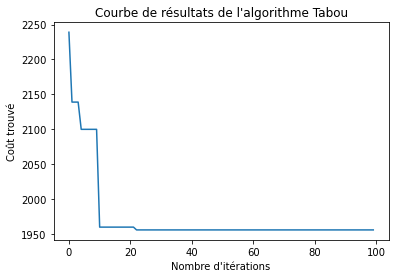

In [13]:

(solf,couti,cfinal,tabou) = algo_tabou()
print("meilleur chemin trouvé: ", solf)
print("coût trouvé: ",couti)
print("tabou:",tabou)

plt.plot(cfinal)
plt.title("Courbe de résultats de l'algorithme Tabou")
plt.xlabel("Nombre d'itérations")
plt.ylabel('Coût trouvé')
plt.show()